In [145]:
#Dependencies

import pandas as pd
import os
import numpy as np

#added as part of visualization
from matplotlib import pyplot as plt
import gmaps



In [2]:
#Assigning path
csv_path_ce = os.path.join("Resources", "ce_00_csv", "conjunto_de_datos", "ce_00_valor.csv")

df = pd.read_csv(csv_path_ce)

df.head()

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,año,valor,unidad_medida
0,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,5000000001,Total de establecimientos. Universo total,1998,3900619,Establecimientos
1,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,5000000001,Total de establecimientos. Universo total,2003,4290108,Establecimientos
2,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,5000000001,Total de establecimientos. Universo total,2008,5144056,Establecimientos
3,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,5000000001,Total de establecimientos. Universo total,2019,6373169,Establecimientos
4,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,5000000002,Personal ocupado. Universo total,1998,18334829,Número de personas


In [3]:
#Indicator_names

indicator_names = df["indicador"].unique()
indicator_names

array(['Total de establecimientos. Universo total',
       'Personal ocupado. Universo total',
       'Unidades económicas. Sector privado y paraestatal',
       'Unidades económicas. Gran sector 43-46. Comercio',
       'Unidades económicas. Gran sector 51 ,53 ,54 ,55, 56, 61, 62, 71, 72 y 81. Servicios privados no financieros',
       'Unidades económicas. Sector 11. Pesca y acuicultura',
       'Unidades económicas. Sector 21. Minería',
       'Unidades económicas. Sector 22. Electricidad, agua y gas',
       'Unidades económicas. Sector 23. Construcción',
       'Unidades económicas. Sector 31-33. Industrias manufactureras',
       'Unidades económicas. Sector 48-49. Transportes',
       'Unidades económicas. Sector 52. Servicios financieros y de seguros',
       'Personal ocupado total.',
       'Personal ocupado total. Gran sector 43-46. Comercio.',
       'Personal ocupado total. Gran sector 51 ,53 ,54 ,55, 56, 61, 62, 71, 72 y 81. Servicios privados no financieros.',
       'Pe

In [4]:
df["id_indicador"].unique()

array([5000000001, 5000000002, 5300000001, 5300000002, 5300000003,
       5300000004, 5300000005, 5300000006, 5300000007, 5300000008,
       5300000009, 5300000010, 5300000011, 5300000012, 5300000013,
       5300000014, 5300000015, 5300000016, 5300000017, 5300000018,
       5300000019, 5300000020, 5300000021, 5300000022, 5300000023,
       5300000024, 5300000025, 5300000026, 5300000027, 5300000028,
       5300000029, 5300000030, 5300000031, 5300000033, 5300000034,
       5300000035, 5300000036, 5300000037, 5300000038, 5300000039,
       5300000040, 5300000041, 5300000043, 5300000044, 5300000045,
       5300000046, 5300000047, 5300000048, 5300000049, 5300000050,
       5300000091, 5300000092, 5300000093, 5300000094, 5300000095,
       5300000096, 5300000097, 5300000098, 5300000099, 5300000100,
       5300000101, 5300000102, 5300000103, 5300000104, 5300000105,
       5300000106, 5300000107, 5300000108, 5300000109, 5300000110,
       6207128098, 6207128124, 6207128131, 6207128136, 6207128

In [5]:
df.dtypes

cve_entidad        int64
desc_entidad      object
cve_municipio      int64
desc_municipio    object
id_indicador       int64
indicador         object
año                int64
valor             object
unidad_medida     object
dtype: object

In [6]:
df["id_indicador"] = pd.to_numeric(df["id_indicador"])

In [7]:
df["id_indicador"].count()

344076

In [8]:
clean_df = df[df.id_indicador <= 6207128097]
clean2_df = clean_df[clean_df.id_indicador != 5300000041 & 5300000043 & 5300000044 & 5300000045 & 5300000046 & 5300000047 & 5300000048
& 5300000049 & 5300000050]
clean2_df["id_indicador"].count()

343466

In [9]:
df2 = clean2_df[(clean2_df["cve_entidad"]>0) & (clean2_df["cve_municipio"]==0) & (clean2_df["valor"]!="C")]
df2["valor"] = df2["valor"].astype(float)
state_df = df2.groupby(["cve_entidad","id_indicador"])
state_df.head()

<ipython-input-9-16a3498846c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["valor"] = df2["valor"].astype(float)


,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,año,valor,unidad_medida
384,1,Aguascalientes,0,Estatal,5000000001,Total de establecimientos. Universo total,1998,39990.000,Establecimientos
385,1,Aguascalientes,0,Estatal,5000000001,Total de establecimientos. Universo total,2003,43522.000,Establecimientos
386,1,Aguascalientes,0,Estatal,5000000001,Total de establecimientos. Universo total,2008,54186.000,Establecimientos
387,1,Aguascalientes,0,Estatal,5000000001,Total de establecimientos. Universo total,2019,67313.000,Establecimientos
388,1,Aguascalientes,0,Estatal,5000000002,Personal ocupado. Universo total,1998,226457.000,Número de personas
...,...,...,...,...,...,...,...,...,...
335581,32,Zacatecas,0,Estatal,5300000109,Total de gastos por consumo de bienes y servic...,2018,1211.166,Millones de pesos
335582,32,Zacatecas,0,Estatal,5300000110,Total de gastos por consumo de bienes y servic...,1998,56.648,Millones de pesos
335583,32,Zacatecas,0,Estatal,5300000110,Total de gastos por consumo de bienes y servic...,2003,67.566,Millones de pesos
335584,32,Zacatecas,0,Estatal,5300000110,Total de gastos por consumo de bienes y servic...,2008,61.825,Millones de pesos


In [10]:
indicador_df = df2.groupby(["id_indicador"])
indicador_df.head()

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,año,valor,unidad_medida
384,1,Aguascalientes,0,Estatal,5000000001,Total de establecimientos. Universo total,1998,39990.000,Establecimientos
385,1,Aguascalientes,0,Estatal,5000000001,Total de establecimientos. Universo total,2003,43522.000,Establecimientos
386,1,Aguascalientes,0,Estatal,5000000001,Total de establecimientos. Universo total,2008,54186.000,Establecimientos
387,1,Aguascalientes,0,Estatal,5000000001,Total de establecimientos. Universo total,2019,67313.000,Establecimientos
388,1,Aguascalientes,0,Estatal,5000000002,Personal ocupado. Universo total,1998,226457.000,Número de personas
...,...,...,...,...,...,...,...,...,...
2712,2,Baja California,0,Estatal,5300000108,Total de gastos por consumo de bienes y servic...,1998,24369.050,Millones de pesos
2716,2,Baja California,0,Estatal,5300000109,Total de gastos por consumo de bienes y servic...,1998,1370.073,Millones de pesos
2720,2,Baja California,0,Estatal,5300000110,Total de gastos por consumo de bienes y servic...,1998,222.110,Millones de pesos
3747,3,Baja California Sur,0,Estatal,5300000006,"Unidades económicas. Sector 22. Electricidad, ...",2018,5.000,Unidades económicas


In [11]:
indicador_df.agg({"valor": ["mean", "median","std","sem"]})

valor                                          
                       mean       median            std           sem
id_indicador                                                         
5000000001    153968.257812  112241.0000  127293.700233  11251.279830
5000000002    822638.312500  595032.5000  791997.305651  70003.333188
5300000001    111986.851562   80496.5000  102187.581588   9032.191487
5300000002     50851.677083   35471.5000   47655.616774   4863.831020
5300000003     40281.281250   28202.0000   37209.489786   3288.885319
...                     ...          ...            ...           ...
5300000106      9502.434000    2138.5825   37208.444375   2325.527773
5300000107      6569.173836    3372.7640   10254.072287    906.340506
5300000108    113646.603617   51195.0710  168019.114479  14850.931902
5300000109      7540.580984    2293.9325   19099.486665   1688.172067
5300000110     19314.824758     329.6100  105703.353318   9342.944741

[70 rows x 4 columns]

In [12]:
state_df.agg({"valor": ["mean", "median","std","sem"]})

valor                              \
                                  mean       median            std   
cve_entidad id_indicador                                             
1           5000000001     51252.75000   48854.0000   12290.234860   
            5000000002    333729.75000  310688.0000  110849.712856   
            5300000001     39664.75000   37309.0000   10541.498925   
            5300000002     17148.00000   17038.0000    2224.041142   
            5300000003     15861.25000   14376.0000    5944.959679   
...                                ...          ...            ...   
32          5300000106       560.58175     497.6890     425.027417   
            5300000107      1612.97600    1785.7670    1195.943186   
            5300000108     14165.39925   12362.1575   10733.672326   
            5300000109       582.87125     407.2345     421.831450   
            5300000110       193.60350      64.6955     263.218775   

                                        
                                   sem  
cve_entidad id_indicador                
1           5000000001     6145.117430  
            5000000002    55424.856428  
            5300000001     5270.749462  
            5300000002     1284.050752  
            5300000003     2972.479839  
...                                ...  
32          5300000106      150.269884  
            5300000107      597.971593  
            5300000108     5366.836163  
            5300000109      210.915725  
            5300000110      131.609388  

[2240 rows x 4 columns]

In [13]:
df2["indicador"] = df2["indicador"].str.rstrip(".")

<ipython-input-13-7135361dc16c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["indicador"] = df2["indicador"].str.rstrip(".")


In [14]:
df2["actividad"] = df2["indicador"].str.split(".").str[-1] 
df2["variable"] = df2["indicador"].str.split(".").str[0] 
df2 ["actividad"] = df2["actividad"].replace({" Agua y gas": " Electricidad, agua y gas"})
df2


<ipython-input-14-913f1c18dd61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["actividad"] = df2["indicador"].str.split(".").str[-1]
<ipython-input-14-913f1c18dd61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["variable"] = df2["indicador"].str.split(".").str[0]
<ipython-input-14-913f1c18dd61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,año,valor,unidad_medida,actividad,variable
384,1,Aguascalientes,0,Estatal,5000000001,Total de establecimientos. Universo total,1998,39990.000,Establecimientos,Universo total,Total de establecimientos
385,1,Aguascalientes,0,Estatal,5000000001,Total de establecimientos. Universo total,2003,43522.000,Establecimientos,Universo total,Total de establecimientos
386,1,Aguascalientes,0,Estatal,5000000001,Total de establecimientos. Universo total,2008,54186.000,Establecimientos,Universo total,Total de establecimientos
387,1,Aguascalientes,0,Estatal,5000000001,Total de establecimientos. Universo total,2019,67313.000,Establecimientos,Universo total,Total de establecimientos
388,1,Aguascalientes,0,Estatal,5000000002,Personal ocupado. Universo total,1998,226457.000,Número de personas,Universo total,Personal ocupado
...,...,...,...,...,...,...,...,...,...,...,...
335581,32,Zacatecas,0,Estatal,5300000109,Total de gastos por consumo de bienes y servic...,2018,1211.166,Millones de pesos,Transportes,Total de gastos por consumo de bienes y servicios
335582,32,Zacatecas,0,Estatal,5300000110,Total de gastos por consumo de bienes y servic...,1998,56.648,Millones de pesos,Servicios financieros y de seguros,Total de gastos por consumo de bienes y servicios
335583,32,Zacatecas,0,Estatal,5300000110,Total de gastos por consumo de bienes y servic...,2003,67.566,Millones de pesos,Servicios financieros y de seguros,Total de gastos por consumo de bienes y servicios
335584,32,Zacatecas,0,Estatal,5300000110,Total de gastos por consumo de bienes y servic...,2008,61.825,Millones de pesos,Servicios financieros y de seguros,Total de gastos por consumo de bienes y servicios


In [15]:
df2 = df2[df2.actividad != "Personal ocupado total"]
df2 = df2[df2.actividad != " Universo total"]

In [16]:
table = pd.pivot_table(df2,values="valor",index=["desc_entidad", "actividad"], columns="variable", aggfunc=np.sum)
table = table.drop(columns=["Acervo total de activos fijos","Producción bruta total"])
table

variable                                            Personal ocupado total  \
desc_entidad   actividad                                                     
Aguascalientes  Comercio                                          173132.0   
                Construcción                                       41193.0   
                Electricidad, agua y gas                            6539.0   
                Industrias manufactureras                         347591.0   
                Minería                                             4837.0   
...                                                                    ...   
Zacatecas       Pesca y acuicultura                                 1662.0   
                Sector privado y paraestatal                           NaN   
                Servicios financieros y de seguros                  3332.0   
                Servicios privados no financieros                 206420.0   
                Transportes                                        15141.0   

variable                                            Total de gastos por consumo de bienes y servicios  \
desc_entidad   actividad                                                                                
Aguascalientes  Comercio                                                                    95002.621   
                Construcción                                                                11618.491   
                Electricidad, agua y gas                                                     5007.404   
                Industrias manufactureras                                                  347747.261   
                Minería                                                                      3592.008   
...                                                                                               ...   
Zacatecas       Pesca y acuicultura                                                            39.607   
                Sector privado y paraestatal                                               234378.364   
                Servicios financieros y de seguros                                            774.414   
                Servicios privados no financieros                                           14257.704   
                Transportes                                                                  2331.485   

variable                                            Total de ingresos por suministro de bienes y servicios  \
desc_entidad   actividad                                                                                     
Aguascalientes  Comercio                                                                   109348.601        
                Construcción                                                                16868.325        
                Electricidad, agua y gas                                                     8823.204        
                Industrias manufactureras                                                  496072.949        
                Minería                                                                      9140.682        
...                                                                                               ...        
Zacatecas       Pesca y acuicultura                                                            82.649        
                Sector privado y paraestatal                                               358544.894        
                Servicios financieros y de seguros                                           1395.014        
                Servicios privados no financieros                                           27834.060        
                Transportes                                                                  4293.939        

variable                                            Total remuneraciones  \
desc_entidad   actividad                                                   
Aguascalientes  Comercio            

In [17]:
table["Utilidad"] = table["Total de ingresos por suministro de bienes y servicios"]-table["Total de gastos por consumo de bienes y servicios"]
table["Ingreso por unidad económica"] = table["Total de ingresos por suministro de bienes y servicios"]/table["Unidades económicas"]
table["Personal promedio por unidad económica"] = table["Personal ocupado total"]/table["Unidades económicas"]
table

variable                                            Personal ocupado total  \
desc_entidad   actividad                                                     
Aguascalientes  Comercio                                          173132.0   
                Construcción                                       41193.0   
                Electricidad, agua y gas                            6539.0   
                Industrias manufactureras                         347591.0   
                Minería                                             4837.0   
...                                                                    ...   
Zacatecas       Pesca y acuicultura                                 1662.0   
                Sector privado y paraestatal                           NaN   
                Servicios financieros y de seguros                  3332.0   
                Servicios privados no financieros                 206420.0   
                Transportes                                        15141.0   

variable                                            Total de gastos por consumo de bienes y servicios  \
desc_entidad   actividad                                                                                
Aguascalientes  Comercio                                                                    95002.621   
                Construcción                                                                11618.491   
                Electricidad, agua y gas                                                     5007.404   
                Industrias manufactureras                                                  347747.261   
                Minería                                                                      3592.008   
...                                                                                               ...   
Zacatecas       Pesca y acuicultura                                                            39.607   
                Sector privado y paraestatal                                               234378.364   
                Servicios financieros y de seguros                                            774.414   
                Servicios privados no financieros                                           14257.704   
                Transportes                                                                  2331.485   

variable                                            Total de ingresos por suministro de bienes y servicios  \
desc_entidad   actividad                                                                                     
Aguascalientes  Comercio                                                                   109348.601        
                Construcción                                                                16868.325        
                Electricidad, agua y gas                                                     8823.204        
                Industrias manufactureras                                                  496072.949        
                Minería                                                                      9140.682        
...                                                                                               ...        
Zacatecas       Pesca y acuicultura                                                            82.649        
                Sector privado y paraestatal                                               358544.894        
                Servicios financieros y de seguros                                           1395.014        
                Servicios privados no financieros                                           27834.060        
                Transportes                                                                  4293.939        

variable                                            Total remuneraciones  \
desc_entidad   actividad                                                   
Aguascalientes  Comercio            

In [18]:
table = pd.pivot_table(df2,values="valor",index=["desc_entidad", "actividad", "año"], columns="variable")
table = table.drop(columns=["Acervo total de activos fijos","Producción bruta total"])
table["Utilidad"] = table["Total de ingresos por suministro de bienes y servicios"]-table["Total de gastos por consumo de bienes y servicios"]
table["Ingreso por unidad económica"] = table["Total de ingresos por suministro de bienes y servicios"]/table["Unidades económicas"]
table["Personal promedio por unidad económica"] = table["Personal ocupado total"]/table["Unidades económicas"]
table["Margen por unidad económica"] =table["Utilidad"]/table["Unidades económicas"]
table

variable                                                Personal ocupado total  \
desc_entidad   actividad                          año                            
Aguascalientes  Comercio                          1998                 44509.0   
                                                  2003                 58438.0   
                                                  2008                 70185.0   
                Construcción                      1998                  8035.0   
                                                  2003                 11816.0   
...                                                                        ...   
Zacatecas       Servicios privados no financieros 2018                 78860.0   
                Transportes                       1998                  3578.0   
                                                  2003                  4032.0   
                                                  2008                  3034.0   
                                                  2018                  4497.0   

variable                                                Total de gastos por consumo de bienes y servicios  \
desc_entidad   actividad                          año                                                       
Aguascalientes  Comercio                          1998                                          15827.325   
                                                  2003                                          29300.882   
                                                  2008                                          49874.414   
                Construcción                      1998                                            720.363   
                                                  2003                                           2091.171   
...                                                                                                   ...   
Zacatecas       Servicios privados no financieros 2018                                           7849.169   
                Transportes                       1998                                            305.850   
                                                  2003                                            389.434   
                                                  2008                                            425.035   
                                                  2018                                           1211.166   

variable                                                Total de ingresos por suministro de bienes y servicios  \
desc_entidad   actividad                          año                                                            
Aguascalientes  Comercio                          1998                                          18354.521        
                                                  2003                                          34761.544        
                                                  2008                                          56232.536        
                Construcción                      1998                                            959.439        
                                                  2003                                           3354.690        
...                                                                                                   ...        
Zacatecas       Servicios privados no financieros 2018                                          14869.731        
                Transportes                       1998                                            475.283        
                                                  2003                                            888.020        
                                                  2008                                            871.420        
                                                  2018                                           2059.216        

variable                        

In [19]:
activity_df = table.reset_index()
activity_df = table.groupby("actividad").pct_change(periods=1)
activity_df

Personal ocupado total  \
desc_entidad   actividad                          año                            
Aguascalientes  Comercio                          1998                     NaN   
                                                  2003                0.312948   
                                                  2008                0.201016   
                Construcción                      1998                     NaN   
                                                  2003                0.470566   
...                                                                        ...   
Zacatecas       Servicios privados no financieros 2018                0.416002   
                Transportes                       1998               -0.765485   
                                                  2003                0.126887   
                                                  2008               -0.247520   
                                                  2018                0.482202   

                                                        Total de gastos por consumo de bienes y servicios  \
desc_entidad   actividad                          año                                                       
Aguascalientes  Comercio                          1998                                                NaN   
                                                  2003                                           0.851285   
                                                  2008                                           0.702147   
                Construcción                      1998                                                NaN   
                                                  2003                                           1.902941   
...                                                                                                   ...   
Zacatecas       Servicios privados no financieros 2018                                           1.027894   
                Transportes                       1998                                          -0.910426   
                                                  2003                                           0.273284   
                                                  2008                                           0.091417   
                                                  2018                                           1.849568   

                                                        Total de ingresos por suministro de bienes y servicios  \
desc_entidad   actividad                          año                                                            
Aguascalientes  Comercio                          1998                                                NaN        
                                                  2003                                           0.893895        
                                                  2008                                           0.617665        
                Construcción                      1998                                                NaN        
                                                  2003                                           2.496512        
...                                                                                                   ...        
Zacatecas       Servicios privados no financieros 2018                                           0.913246        
                Transportes                       1998                                          -0.929439        
                                                  2003                                           0.868403        
                                                  2008                                          -0.018693        
                                                  2018                                           1.363058        

                                                        Total remuneraciones  \
desc_ent

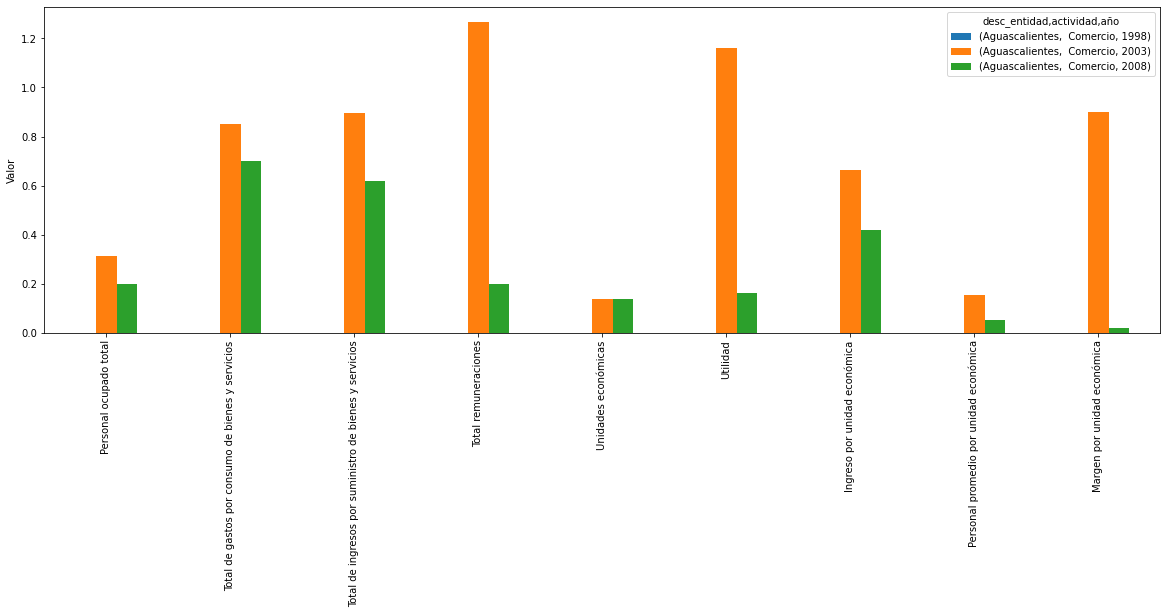

Personal ocupado total  \
desc_entidad   actividad año                            
Aguascalientes  Comercio 1998                     NaN   
                         2003                0.312948   
                         2008                0.201016   

                               Total de gastos por consumo de bienes y servicios  \
desc_entidad   actividad año                                                       
Aguascalientes  Comercio 1998                                                NaN   
                         2003                                           0.851285   
                         2008                                           0.702147   

                               Total de ingresos por suministro de bienes y servicios  \
desc_entidad   actividad año                                                            
Aguascalientes  Comercio 1998                                                NaN        
                         2003                                           0.893895        
                         2008                                           0.617665        

                               Total remuneraciones  Unidades económicas  \
desc_entidad   actividad año                                               
Aguascalientes  Comercio 1998                   NaN                  NaN   
                         2003              1.264380             0.137307   
                         2008              0.198873             0.140099   

                               Utilidad  Ingreso por unidad económica  \
desc_entidad   actividad año                                            
Aguascalientes  Comercio 1998       NaN                           NaN   
                         2003  1.160759                      0.665245   
                         2008  0.164350                      0.418882   

                               Personal promedio por unidad económica  \
desc_entidad   actividad año                                            
Aguascalientes  Comercio 1998                                     NaN   
                         2003                                0.154436   
                         2008                                0.053432   

                               Margen por unidad económica  
desc_entidad   actividad año                                
Aguascalientes  Comercio 1998                          NaN  
                         2003                     0.899890  
                         2008                     0.021271

In [127]:
#Visualization of data STARTS HERE!


#Testing with one entidad and one actividad
test_df = activity_df[
                        (activity_df.index.get_level_values(0)=="Aguascalientes")\
                      & (activity_df.index.get_level_values(1)==" Comercio")]#["Margen por unidad económica"]


#Plotting bar chart
ax = test_df.T.plot(kind='bar')
ylab = ax.set_ylabel('Valor')
plt.rcParams["figure.figsize"] = [20, 6]
plt.show()
test_df.head()


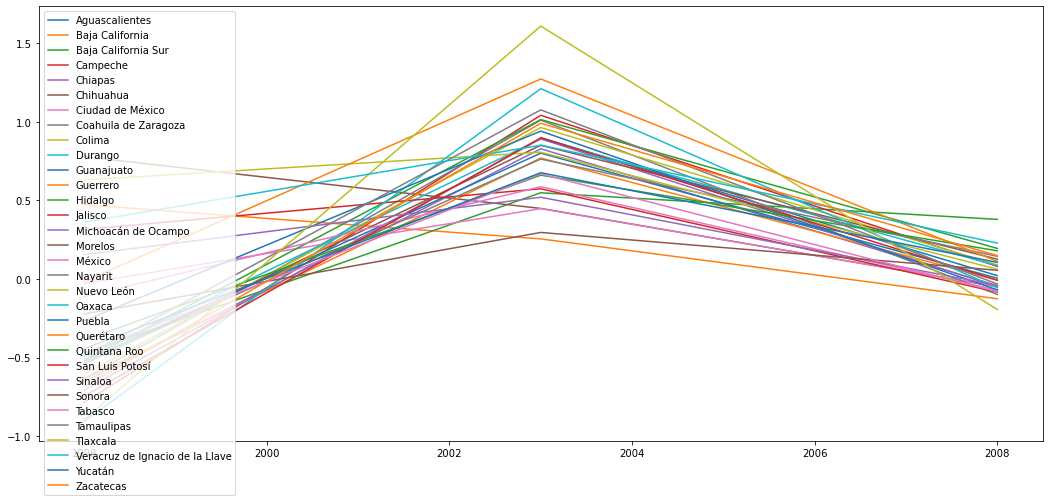

In [139]:
#Plotting multiple line graphs, one for each state
estados = activity_df.index.get_level_values(0).unique()
#estados = ["Nuevo León","México","Ciudad de México","Jalisco"]
plt.figure(figsize = (18, 8))

for estado in estados:
    test_df = activity_df[
                        (activity_df.index.get_level_values(0)==estado)\
                      & (activity_df.index.get_level_values(1)==" Comercio")]#["Margen por unidad económica"]
    plt.plot(test_df.index.get_level_values(2), test_df["Margen por unidad económica"])
plt.legend(estados)
plt.show()

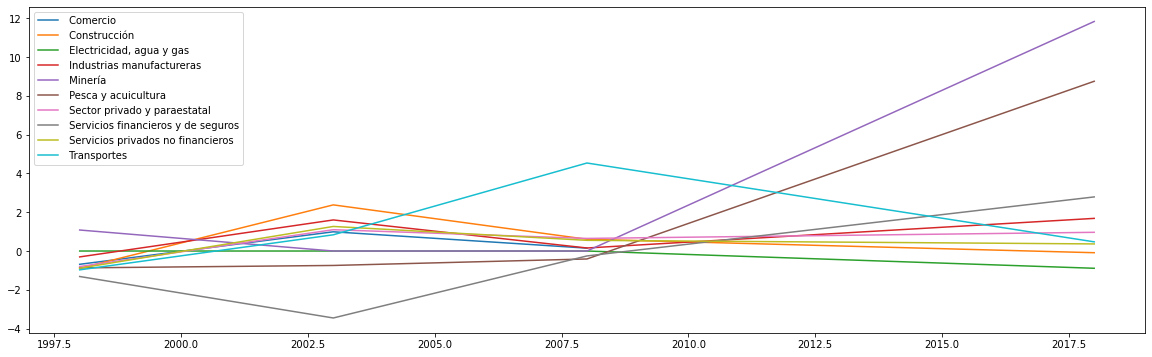

In [129]:



#Plotting multiple line graphs, one for each activity within the same state
actividades = activity_df.index.get_level_values(1).unique()
for actividad in actividades:
    test_df = activity_df[
                        (activity_df.index.get_level_values(0)=="Zacatecas")\
                      & (activity_df.index.get_level_values(1)==actividad)]#["Margen por unidad económica"]
    plt.plot(test_df.index.get_level_values(2), test_df["Margen por unidad económica"])
plt.legend(actividades)
plt.show()


In [148]:
#Test map graph
#Reading file with Mexico states Lat-Lon
csv_path_ce = os.path.join("Resources", "EstadosMexico.csv")
estados_df = pd.read_csv(csv_path_ce)

locations = estados_df[["Latitude", "Longitude"]].astype(float)
weights = [10,20,30,40,50,60,70,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]

fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=weights, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

fig.add_layer(heat_layer)
fig



Figure(layout=FigureLayout(height='420px'))